In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Portfolio Analysis for Fama48 (monthly returns)

This notebook analyses the results of different covariance estimators on the Fama 48 industry portfolio dataset (run using the script `portfolio_optim.py`) for different strides. We start investing in January 1974. We use the last 50 months to estimate the covariance matrix, this is then used for the next `stride` months. Afterwards, we repeat the process. Below, we give a graphical representation of the method. For each window (orange), we estimate the covariance matrix using data from the preceeding 50 months. This is then used for portfolio allocation. Afterwards, we use this portfolio for the next `stride` months.

![alt text](plots/plot_setup.pdf "Title")

All result plots contain the stride parameter on the x-axis.

In [2]:
df = pd.read_csv('results_fama48_stride.csv')

In [3]:
df.loc[df['method']=='Linear', 'method'] = 'Linear LW'
df.loc[df['method']=='NLLW', 'method'] = 'Nonlinear LW'
df.loc[df['method']=='Linear Diagonal', 'method'] = 'Linear-Diagonal LW'

In [4]:
df

,Unnamed: 0,mean,std,sharpe,stride,method
0,0,0.599590,14.832225,0.040425,1,Empirical
1,1,0.753287,4.410398,0.170798,1,Linear LW
2,2,0.789492,4.292925,0.183905,1,Linear-Diagonal LW
3,3,1.043800,4.784690,0.218154,1,Wasserstein
4,4,1.117354,5.398823,0.206963,1,KL
...,...,...,...,...,...,...
67,67,0.842320,5.487767,0.153490,60,Wasserstein
68,68,0.847346,5.910573,0.143361,60,KL
69,69,0.864383,5.485975,0.157562,60,Fisher-Rao
70,70,0.795533,5.405803,0.147163,60,WISE


# Comparison of Sharpe Ratios

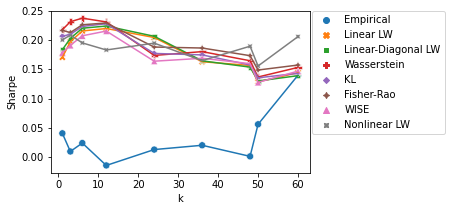

In [5]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
sns.lineplot(x='stride', y='sharpe', hue='method', data=df, legend=False, ax=ax);
sns.scatterplot(x='stride', y='sharpe', hue='method', style='method', data=df, s=50, ax=ax);
plt.xlabel('k')
plt.ylabel('Sharpe')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/fama_sharpe.pdf', bbox_inches='tight')

Let's zoom in on the best part

(0.15, 0.25)

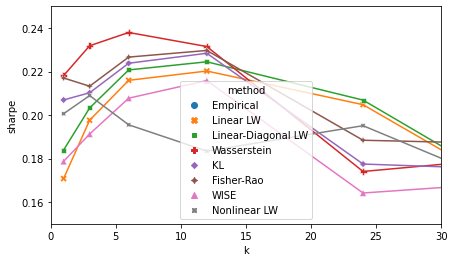

In [6]:
plt.figure(figsize=(7,4))
sns.lineplot(x='stride', y='sharpe', hue='method', data=df, legend=False);
sns.scatterplot(x='stride', y='sharpe', hue='method', style='method', data=df, s=50);
plt.xlabel('k')
plt.xlim(0, 30)
plt.ylim((0.15, 0.25))

# Comparison of Mean Returns

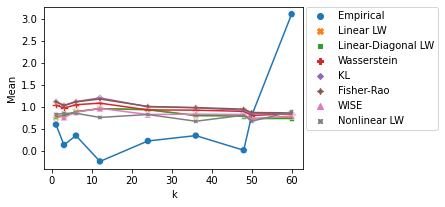

In [7]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
sns.lineplot(x='stride', y='mean', hue='method', data=df, legend=False, ax=ax);
sns.scatterplot(x='stride', y='mean', hue='method', style='method', data=df, s=50, ax=ax);
plt.xlabel('k')
plt.ylabel('Mean')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/fama_mean.pdf', bbox_inches='tight')

Let's zoom in on the best part

(0.5, 1.5)

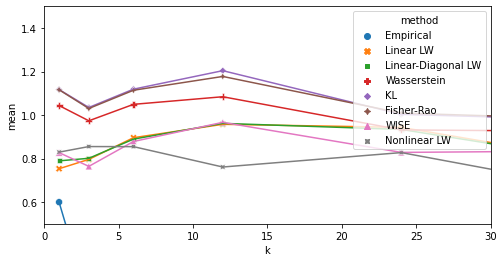

In [8]:
plt.figure(figsize=(8,4))
sns.lineplot(x='stride', y='mean', hue='method', data=df, legend=False);
sns.scatterplot(x='stride', y='mean', hue='method', style='method', data=df, s=50);
plt.xlabel('k')
plt.xlim(0, 30)
plt.ylim((0.5, 1.5))

# Comparison of Return Standard Deviation

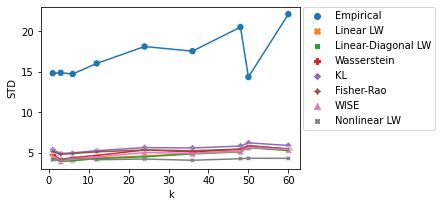

In [9]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
sns.lineplot(x='stride', y='std', hue='method', data=df, legend=False, ax=ax);
sns.scatterplot(x='stride', y='std', hue='method', style='method', data=df, s=50, ax=ax);
plt.xlabel('k')
plt.ylabel('STD')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/fama_std.pdf', bbox_inches='tight')

Let's zoom in on the best part

Text(0.5, 0, 'k')

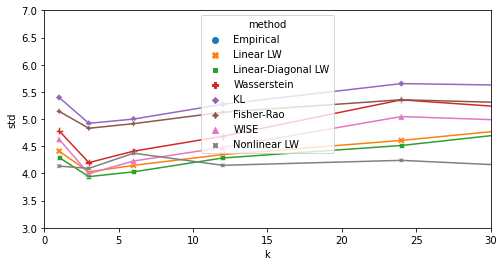

In [10]:
plt.figure(figsize=(8,4))
sns.lineplot(x='stride', y='std', hue='method', data=df, legend=False);
sns.scatterplot(x='stride', y='std', hue='method', style='method', data=df, s=50);
plt.xlim(0, 30)
plt.ylim((3, 7))
plt.xlabel('k')

# Summary
We can see that the sharpe ratio is decreasing with increasing stride. Furhter, for low strides (see zoomed in version), our methods achieve the best sharpe ratio by having slightly higher risk (std) and higher mean returns. Furhter note that all shrinkage methods greatly improve the result with respect to the empirical covariance method. 